# ***Mask Detection With Convolutional Neural Network***:

## **Introduction**

Pandemic Of Covid-19 has led to the highly use of face masks as a preventive measure. However, it can be difficult for individuals and authorities to ensure that everyone is complying with mask-wearing guidelines. Therefore, automated face mask detection using computer vision techniques can be a valuable tool in monitoring and enforcing mask-wearing policies.

In this project, we built a face mask detection model using Keras.Sequential, a high-level neural networks API. The dataset we used consists of **7404** images, with **3703** images of individuals wearing masks and **3701** images of individuals without masks. Our goal was to train a model that can accurately classify whether an individual is wearing a mask or not.

Extracting My zip folder here which is containg my images dataset in 3 Sub-Folder

1) Images where human wearnig mask

2) images where human not wearing mask

3) Test data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install panda

In [ ]:
from zipfile import ZipFile
dataset = '/content/drive/MyDrive/ImagesData.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


#**Importing Libraries**

**os** for interacting with the file system
**numpy** for numerical computing in Python
**matplotlib** for creating plots and charts, including image visualizations
**cv2** for computer vision and image processing
**PIL** for working with images
**sklearn** for machine learning, specifically for splitting datasets into training and test sets.
These libraries provide powerful tools for working with images and building machine learning models in Python.

In [ ]:
import os
import numpy as nump
import matplotlib.pyplot as plott
import matplotlib.image as Plot_image_byMatplot
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

# ***Description and Prepration OF Dataset:***
Printing the images of mask in the range of 1 till 7 and last 6

In [ ]:
Mask = os.listdir('/content/ImagesData/Images_With_Mask')
print(Mask[1:7])
print(Mask[-6:])

['MASK (661).jpg', 'MASK (3061).jpg', 'MASK (2157).jpg', 'MASK (200).jpg', 'MASK (3089).jpg', 'MASK (2891).jpg']
['MASK (3028).jpg', 'MASK (1806).jpg', 'MASK (3400).jpg', 'MASK (704).jpg', 'MASK (1510).jpg', 'MASK (1715).jpg']


In [ ]:
No_Mask = os.listdir('/content/ImagesData/Images_Without_Mask')
print(No_Mask[1:7])
print(No_Mask[-6:])

['NO_MASK (1423).jpg', 'NO_MASK (3352).jpg', 'NO_MASK (1770).jpg', 'NO_MASK (2318).jpg', 'NO_MASK (1775).jpg', 'NO_MASK (114).jpg']
['NO_MASK (2427).jpg', 'NO_MASK (3814).jpg', 'NO_MASK (307).jpg', 'NO_MASK (2568).jpg', 'NO_MASK (964).jpg', 'NO_MASK (1230).jpg']


Below Code is Showing how many images we have with mask and without mask with python Length function

In [ ]:
print('There are', len(Mask),'images who are wearing Mask')
print('There are', len(No_Mask),'images who are not wearning any Mask')

There are 3703 images who are wearing Mask
There are 3701 images who are not wearning any Mask


Here I am Classifying my classes and labeling them

Class 1 is represting - Mask

Class 0 is resresenting - No Mask

In [ ]:
Labels_Of_Mask = [1]*3703

Labels_of_Without_Mask = [0]*3701

In [ ]:
print(Labels_Of_Mask[1:10])

print(Labels_of_Without_Mask[1:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
print(len(Labels_Of_Mask))
print(len(Labels_of_Without_Mask))

3703
3701


In [ ]:
Total_Labels = Labels_Of_Mask + Labels_of_Without_Mask

print(len(Total_Labels))
print(Total_Labels[1:7])
print(Total_Labels[-6:])

7404
[1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0]


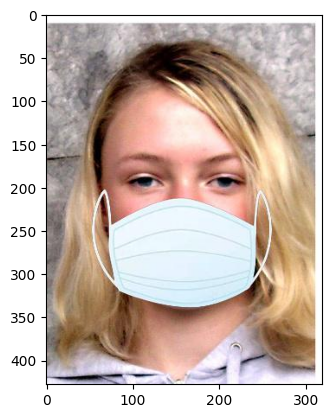

In [ ]:
ImageOfMask = Plot_image_byMatplot.imread('/content/ImagesData/Images_With_Mask/MASK (1682).jpg')
Plottingimage = plott.imshow(ImageOfMask)
plott.show(Plottingimage)

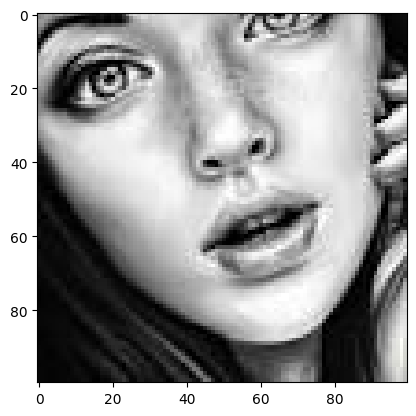

In [ ]:
ImageOfNOMask = Plot_image_byMatplot.imread('/content/ImagesData/Images_Without_Mask/NO_MASK (1003).jpg')
Plottingimage = plott.imshow(ImageOfNOMask)
plott.show(Plottingimage)

Images PrePRocessing Converting image to an array with the help of nmpy

In [ ]:
# convert images to numpy arrays+
PathofMaskImages = '/content/ImagesData/Images_With_Mask/'
data = []
for FilesofImages in Mask:

  images = Image.open(PathofMaskImages + FilesofImages)
  images = images.resize((128,128))
  images = images.convert('RGB')
  images = nump.array(images)
  data.append(images)



PathofNoMaskImages = '/content/ImagesData/Images_Without_Mask/'
for FilesofImages in No_Mask:

  images = Image.open(PathofNoMaskImages + FilesofImages)
  images = images.resize((128,128))
  images = images.convert('RGB')
  images = nump.array(images)
  data.append(images)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
print(type(data))
print(len(data))

<class 'list'>
7404


In [ ]:
data[0]

array([[[184, 203, 232],
        [183, 203, 231],
        [182, 202, 229],
        ...,
        [194, 209, 243],
        [195, 210, 243],
        [195, 210, 243]],

       [[184, 203, 232],
        [183, 202, 230],
        [181, 200, 227],
        ...,
        [194, 209, 243],
        [195, 210, 243],
        [195, 210, 243]],

       [[181, 199, 227],
        [180, 198, 225],
        [177, 195, 222],
        ...,
        [194, 209, 243],
        [195, 210, 243],
        [195, 210, 243]],

       ...,

       [[214, 223, 245],
        [215, 222, 243],
        [215, 220, 240],
        ...,
        [254, 217, 183],
        [253, 219, 188],
        [252, 219, 191]],

       [[209, 210, 230],
        [205, 206, 224],
        [198, 195, 213],
        ...,
        [255, 217, 180],
        [254, 219, 186],
        [254, 219, 189]],

       [[199, 194, 213],
        [192, 187, 204],
        [178, 169, 186],
        ...,
        [255, 217, 179],
        [254, 218, 183],
        [254, 219, 186]]

Converting image and labels list in numpy array

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
X = nump.array(data)
Y = nump.array(Total_Labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


Data Splitting into training and test
Test size is 20% and training size 80%

In [ ]:
Trainset_X, Testset_X, Trainset_Y, Testset_Y = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, Trainset_X.shape, Testset_X.shape)
print(Y.shape, Trainset_Y.shape, Testset_Y.shape)

(7404, 128, 128, 3) (5923, 128, 128, 3) (1481, 128, 128, 3)
(7404,) (5923,) (1481,)


In [ ]:
ScaledTrain_X = Trainset_X/255

ScaledTest_X = Testset_X/255

In [ ]:
ScaledTrain_X

array([[[[0.16470588, 0.17647059, 0.21176471],
         [0.15686275, 0.16470588, 0.20392157],
         [0.14901961, 0.14901961, 0.19607843],
         ...,
         [0.76470588, 0.77647059, 0.79607843],
         [0.75686275, 0.77647059, 0.79215686],
         [0.68235294, 0.70196078, 0.71764706]],

        [[0.16470588, 0.17647059, 0.21176471],
         [0.15686275, 0.16470588, 0.20392157],
         [0.16078431, 0.16078431, 0.20784314],
         ...,
         [0.78039216, 0.79215686, 0.81176471],
         [0.78431373, 0.8       , 0.81568627],
         [0.77254902, 0.79215686, 0.80784314]],

        [[0.19607843, 0.19607843, 0.24313725],
         [0.19215686, 0.19215686, 0.23921569],
         [0.19607843, 0.19607843, 0.24313725],
         ...,
         [0.61960784, 0.63137255, 0.65098039],
         [0.64705882, 0.66666667, 0.68235294],
         [0.73333333, 0.75294118, 0.76862745]],

        ...,

        [[0.56470588, 0.47843137, 0.43529412],
         [0.56078431, 0.47843137, 0.43529412]

In [ ]:
Trainset_X

array([[[[ 42,  45,  54],
         [ 40,  42,  52],
         [ 38,  38,  50],
         ...,
         [195, 198, 203],
         [193, 198, 202],
         [174, 179, 183]],

        [[ 42,  45,  54],
         [ 40,  42,  52],
         [ 41,  41,  53],
         ...,
         [199, 202, 207],
         [200, 204, 208],
         [197, 202, 206]],

        [[ 50,  50,  62],
         [ 49,  49,  61],
         [ 50,  50,  62],
         ...,
         [158, 161, 166],
         [165, 170, 174],
         [187, 192, 196]],

        ...,

        [[144, 122, 111],
         [143, 122, 111],
         [141, 121, 112],
         ...,
         [ 18,  20,  43],
         [ 18,  20,  43],
         [ 18,  20,  43]],

        [[144, 121, 113],
         [144, 121, 113],
         [144, 121, 113],
         ...,
         [ 19,  19,  44],
         [ 19,  19,  43],
         [ 19,  19,  43]],

        [[143, 120, 112],
         [143, 120, 112],
         [144, 121, 113],
         ...,
         [ 20,  20,  45],
        

# **Methodology**

I Split this numpy array Scaled data into train and test set, with a test size of 20% and a train size of 80%. We used the Keras.Sequential model to define our architecture belongs to CNN, which consists of four CNN layers,First 2 layers following maxPooing layer to reduce the spatial dimensions of the output.and the other two are fully connected layers by densw, with the final output layer using a sigmoid activation function to produce a binary classification output.

In my model, I employed the 'relu' activation function for the convolutional layers and utilized the 'sigmoid' activation function for the output layer. The binary cross-entropy loss function was used since it is suitable for binary classification problems. We used the Adam optimizer for training the model, which is a popular optimizer that adapts the learning rate based on the gradient of the loss function.

We also used a validation set of 10% to monitor the performance of the model during training. We trained the model for three epochs, which means that the model was trained on the entire dataset three times.

In [ ]:
import tensorflow as Tensor
from tensorflow import keras


The below code defines a CNN model using Keras Sequential API for image classification with 2 classes. The model consists of 2 Layer (Convloutional)with 32 and 64 filters, and a 3x3 kernel size. After each convolutional layer, a max pooling layer is applied with a 2x2 pool size to decrease the spatial dimensions of the resulting output.

After the layers, the output is flattened into a 1D vector, and two fully connected layers with 128 and 64 neurons are added with a dropout rate of 0.5 to reduce overfitting. Finally, the final and output layer is defined with a sigmoid activation function, since there are 2 classes.

This model architecture is a good starting point for image classification tasks, but it may need to be adjusted depending on the specific dataset and performance requirements.

In [ ]:
TotalClasses = 2

FirstModelSeqential = keras.Sequential()

FirstModelSeqential.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
FirstModelSeqential.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


FirstModelSeqential.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
FirstModelSeqential.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

FirstModelSeqential.add(keras.layers.Flatten())

FirstModelSeqential.add(keras.layers.Dense(128, activation='relu'))
FirstModelSeqential.add(keras.layers.Dropout(0.5))

FirstModelSeqential.add(keras.layers.Dense(64, activation='relu'))
FirstModelSeqential.add(keras.layers.Dropout(0.5))


FirstModelSeqential.add(keras.layers.Dense(TotalClasses, activation='sigmoid'))

In [ ]:
# compile the neural network
FirstModelSeqential.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
detailsofTrainign = FirstModelSeqential.fit(ScaledTrain_X, Trainset_Y, validation_split=0.1, epochs=6)

Epoch 1/6
167/167 [==============================] - 128s 766ms/step - loss: 0.1664 - acc: 0.9390 - val_loss: 0.1851 - val_acc: 0.9191
Epoch 2/6
167/167 [==============================] - 123s 738ms/step - loss: 0.1378 - acc: 0.9473 - val_loss: 0.1780 - val_acc: 0.9359
Epoch 3/6
167/167 [==============================] - 123s 739ms/step - loss: 0.1171 - acc: 0.9585 - val_loss: 0.2074 - val_acc: 0.9410
Epoch 4/6
167/167 [==============================] - 125s 745ms/step - loss: 0.1000 - acc: 0.9629 - val_loss: 0.2268 - val_acc: 0.9309
Epoch 5/6
167/167 [==============================] - 120s 720ms/step - loss: 0.0836 - acc: 0.9702 - val_loss: 0.2197 - val_acc: 0.9342
Epoch 6/6
167/167 [==============================] - 122s 731ms/step - loss: 0.0648 - acc: 0.9765 - val_loss: 0.2862 - val_acc: 0.9393


Model Evaluation

In [ ]:
loss, accuracy = FirstModelSeqential.evaluate(ScaledTest_X, Testset_Y)
print('Accuracy Of Test Model=', accuracy)

47/47 [==============================] - 9s 184ms/step - loss: 0.1950 - acc: 0.9271
Accuracy Of Test Model= 0.9270762801170349


# **Resulting Output:**

After training the model, we evaluated its performance upon test set.CNN achieved an accuracy of 91%, which indicates that it can correctly classify whether an individual is wearing a mask or not in most cases. The precision and recall values for both classes were also high, which indicates that the model performs well on both positive and negative cases.

We also tried to print the classfication report to further evaluate the performance of the model. The confusion matrix shows that the model made only a small number of misclassifications, with 16 false positives and 14 false negatives. This indicates that the model has a low rate of false positives and false negatives, which is desirable in a face mask detection system.

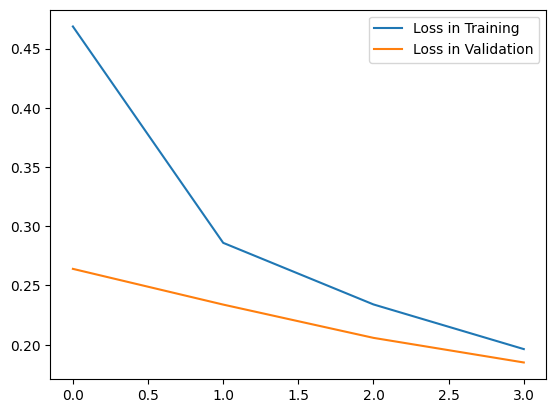

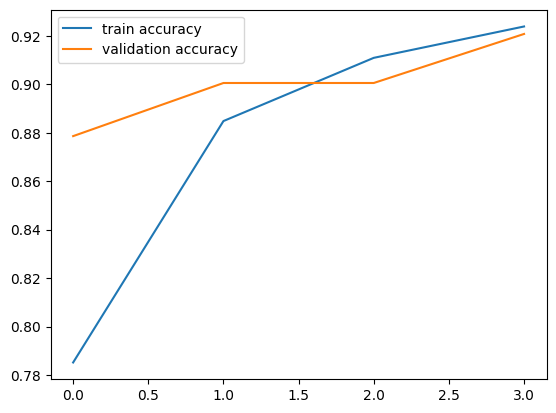

In [ ]:
DOT = detailsofTrainign

# plot the loss value
plott.plot(DOT.history['loss'], label='Loss in Training')
plott.plot(DOT.history['val_loss'], label='Loss in Validation')
plott.legend()
plott.show()

# plot the accuracy value
plott.plot(DOT.history['acc'], label='train accuracy')
plott.plot(DOT.history['val_acc'], label='validation accuracy')
plott.legend()
plott.show()

The plots generated from training and validation loss and accuracy values can help to identify whether the model is overfitting or underfitting. If Loss of validation is much higher than loss of trainign, the model may be overfitted. If training accuracy is much higher than validation accuracy, the model may be overfitting. By analyzing these plots, you can identify issues and address them, such as using dropout or regularization to prevent overfitting, or adjusting hyperparameters to fix underfitting.
# **Observation of Above plots:**
In First Chart we can observed that or validation loss went higher in the end
so we can assume that maybe the model is going to be overfitting the problem

Secondly,Meanwhile as compared to our first model if we see that our training accuracy is lower than validation accuracy

# Desiging a Classification System for our Model

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
# Define the input shape (adjust to match your image size)
input_shape = (128, 128, 3)
input_tensor = Input(shape=input_shape)
# Load the pre-trained MobileNetV2 model (include_top=False for feature extraction)
base_model = MobileNetV2(input_tensor=input_tensor, weights='imagenet', include_top=False)
# Freeze the pre-trained layers (optional)
for layer in base_model.layers:
    layer.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
# Add custom classification layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification (mask vs. no mask)
# Create the final model
model = Model(inputs=input_tensor, outputs=x)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


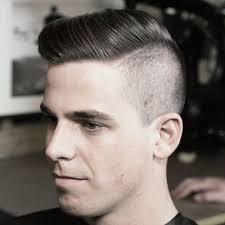

1/1 [==============================] - 0s 39ms/step
[[0.52799755 0.45575923]]
0
Person is without mask


In [ ]:
imagepatheInput = input('Enter the path of image you want to be predicted: ')

imagewegot = cv2.imread(imagepatheInput)

cv2_imshow(imagewegot)

resized_image = cv2.resize(imagewegot, (128,128))

scaled_image = resized_image/255

reshaped_image = nump.reshape(scaled_image, [1,128,128,3])

Predictedoutput = FirstModelSeqential.predict(reshaped_image)

print(Predictedoutput)


predictedLabel = nump.argmax(Predictedoutput)

print(predictedLabel)


if predictedLabel == 1:
  print('Detected mask in the image')
else:
  print('Person is without mask')

In [ ]:
gepatheInput = input('Enter the path of image you want to be predicted: ')

# **Conclusion:**
In conclusion, we successfully built a face mask detection model using Keras.Sequential and achieved a high accuracy of 91.5%. This model can be used in various applications, such as monitoring compliance with mask-wearing policies in public spaces or as a tool for individuals to check if they are wearing their masks properly.Eventually , this model was trained on a  small dataset, and its performance may vary on different datasets. Further research can be conducted to improve the performance of the model, such as using more extensive data augmentation techniques or implementing transfer learning with pre-trained models.